### Import necessary modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df = vv.dataset_modelling_version(iteration_code="0000_00000000",feature_columns=['bedrooms','bathrooms'])
print(df.shape)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:283: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 28926/38657/32890/33315 ==> 28926/29175/28970/28980
type <class 'pandas.core.indexes.base.Index'>
(28909, 3)


,Price,bedrooms,bathrooms
ids,,,
124766582,375000.0,3.0,2.0
122631866,375000.0,3.0,1.0
123387620,375000.0,2.0,1.0
112916297,375000.0,2.0,1.0
121895336,375000.0,2.0,2.0
90172108,375000.0,3.0,1.0
85484115,375000.0,2.0,1.0
110816861,375000.0,2.0,1.0
115658771,375000.0,1.0,1.0


### Get the property listings data and store in a dataframe

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28909 entries, 124766582 to 97494416
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      28909 non-null  object 
 1   bedrooms   27621 non-null  float64
 2   bathrooms  26858 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.9+ MB


In [3]:
if False:
    df[
    #['Address', 'analyticsProperty.maxSizeAc', 'analyticsProperty.maxSizeFt', 'analyticsProperty.minSizeAc', 'analyticsProperty.minSizeFt', 'date_scraped', 'date_scraped_model',     'date_scraped_model', 'date_scraped_meta']]
    #df['location.latitude'].notnull()]
    df['location.latitude'].isnull()]

    #df.loc[123715148]

    print(df.shape)
    df["location.latitude"] = pd.to_numeric(df["location.latitude"], 'coerce').dropna().astype(int)
    df["analyticsProperty.imageCount"] = pd.to_numeric(df["analyticsProperty.imageCount"], 'coerce').dropna().astype(int)
    df["analyticsProperty.added"] = pd.to_numeric(df["analyticsProperty.added"], 'coerce').dropna().astype(int)
    print(df.shape)
    df.info()

KeyError: 'location.latitude'

In [4]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,bedrooms,bathrooms
ids,,,
85432989,375000.0,1.0,NaN
119547980,375000.0,2.0,NaN
124560302,375000.0,1.0,NaN
124266887,375000.0,3.0,NaN
124667093,380000.0,2.0,NaN
85524399,375000.0,1.0,NaN
113453195,375000.0,2.0,NaN
122145023,375000.0,NaN,1.0
96629128,375000.0,1.0,NaN


In [ ]:
median_bathroom = df['bathrooms_model'].median()
print(median_bathroom)

df['bathrooms_model'].fillna(median_bathroom, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

In [ ]:
median_bedrooms = df['bedrooms_model'].median()
print(median_bedrooms)

df['bedrooms_model'].fillna(median_bedrooms, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

In [ ]:
median_imageCount = df['analyticsProperty.imageCount'].median()
print(median_imageCount)

df['analyticsProperty.imageCount'].fillna(median_imageCount, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

In [ ]:
median_added = df['analyticsProperty.added'].median()
print(median_added)

df['analyticsProperty.added'].fillna(median_added, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

In [ ]:
#df = df['Price'].dropna()
#sample_incomplete_rows = df[df.isnull().any(axis=1)].copy() #.head()
#sample_incomplete_rows
df = df.dropna(subset="Price")
df = df.dropna(subset=["analyticsProperty.added", 'location.latitude', 'location.longitude'])

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

In [ ]:
df.isnull().any() == True

## Prepare data for training the model

In [14]:
#df = df.dropna(subset="Price")
df = df.dropna()
df["Price"] = pd.to_numeric(df["Price"], 'coerce').dropna().astype(int)
df.isnull().any() == True

Price        False
bedrooms     False
bathrooms    False
dtype: bool

In [15]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
## Build a Random Forest model

In [16]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import LinearSVR
#regressor = LinearSVR(epsilon=1.5,)
from sklearn.svm import SVR
regressor = SVR(epsilon=0.1,kernel="rbf",degree=2,C=100)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Evaluate the model on the test data

In [17]:
print(type(y_test.values))
print(type(y_pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
metrics.mean_squared_error(y_test.values, y_pred)

109874295634.53766

##

In [19]:
#metrics.accuracy_score(y_test.values, y_pred)
regressor.score(X_test, y_test)
#regressor.score(X, y)

0.0542462694967093

In [20]:
sorted(zip(y_test,y_pred),reverse=True)

[(7850000, 464230.89672385954),
 (4695000, 467136.85485269414),
 (4250000, 502826.58135186345),
 (3750000, 489929.0913922178),
 (3250000, 497921.84906206967),
 (2450000, 475437.69600717764),
 (1750000, 489929.0913922178),
 (1695000, 514697.8522675764),
 (1650000, 525000.099338628),
 (1595000, 514697.8522675764),
 (1500000, 489929.0913922178),
 (1450000, 489929.0913922178),
 (1400000, 495990.3193714949),
 (1395000, 495990.3193714949),
 (1300000, 450774.430982838),
 (1300000, 349994.9001436546),
 (1250000, 525000.099338628),
 (1245000, 450774.430982838),
 (1150000, 489929.0913922178),
 (1100000, 514697.8522675764),
 (1000000, 525000.099338628),
 (950000, 525000.099338628),
 (900000, 514697.8522675764),
 (900000, 450774.430982838),
 (900000, 399950.1009016736),
 (899950, 450774.430982838),
 (899950, 450774.430982838),
 (895000, 349994.9001436546),
 (879000, 399950.1009016736),
 (875000, 525000.099338628),
 (875000, 450774.430982838),
 (860000, 514697.8522675764),
 (850000, 514697.85226757

In [21]:
y_pred = regressor.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])
true_vs_pred

,actual,predicted
0,7850000,464230.896724
1,4695000,467136.854853
2,4250000,502826.581352
3,3750000,489929.091392
4,3250000,497921.849062
5,2450000,475437.696007
6,1750000,489929.091392
7,1695000,514697.852268
8,1650000,525000.099339
9,1595000,514697.852268


In [22]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

109874295634.53766

<AxesSubplot:xlabel='actual', ylabel='predicted'>

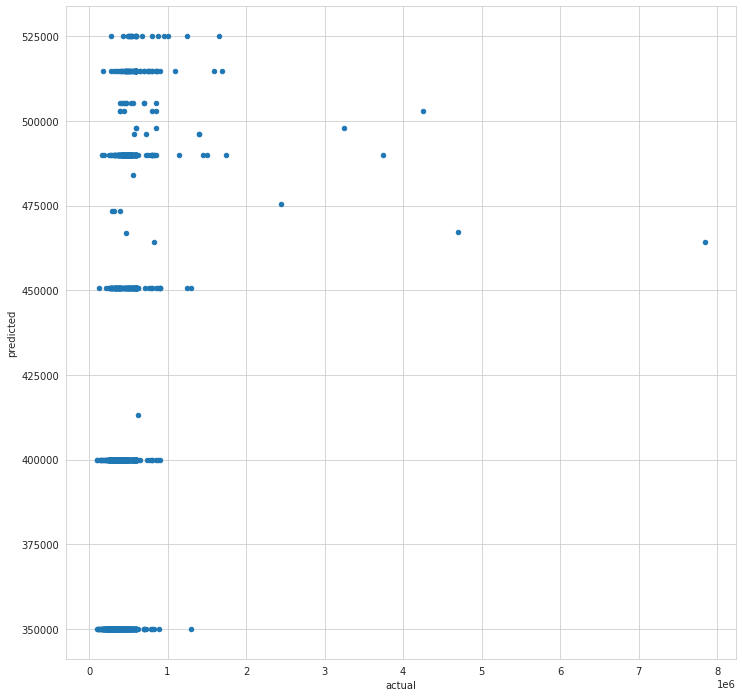

In [23]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))